# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from multiprocessing import Process, Queue

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

from keras.optimizers import SGD, adam, adagrad, rmsprop


Using TensorFlow backend.


## importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *
from prepareDatabaseForMachineLearning import*

## Writing own code

In [3]:
def trainNetwork(network, trainingData, validationSplit, numberOfEpochs=50, batchSize=32, verboseSetting=-1):
    """
    hjhgj
    
    network is the Keras network to be trained.
    trainingData is the data to be trained with. It is a tupple with the index zero being the input data and index one being the target/output value.
    validationData is the data used to do validation.  It is a tupple with the index zero being the input data and index one being the target/output value.
    numberOfEpochs is the number of epochs the model will train for default is 50.
    batchSize is the size of the batches during gradiant decent defaul is 32.
    verboseSettings are the verbose settings default is -1 (which does nothing), 0 results in plots and above that normal rules apply.
    """
    
    #print(np.shape(trainingData[0]))
    #print(np.shape(trainingData[0][0]))
    #print(np.shape(trainingData[1]))
    
    #print(trainingData[0])
    
    fitDetails = network.fit(trainingData[0], trainingData[1], shuffle=True, batch_size=batchSize, validation_split = validationSplit, epochs=numberOfEpochs, verbose=max(0,verboseSetting))
    
    history = {'loss': fitDetails.history['loss'], 'val_loss': fitDetails.history['val_loss']}
    
    if verboseSetting>=0:
        
        maximumValue = max(max(history['loss']), max(history['val_loss']))
        minimumValue = min(min(history['loss']), min(history['val_loss'])) / 10#math.pow(math.floor(math.log(min(min(history['loss']), min(history['val_loss'])), 10)) - 1, 10)
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
        ax1.plot([i for i in range(1, numberOfEpochs + 1)], history['loss'], label='Training loss')
        ax1.plot([i for i in range(1, numberOfEpochs + 1)], history['val_loss'], label='Validation loss')
        ax1.legend()
        ax1.set_xlim(1, numberOfEpochs)
        ax1.set_ylim(0, maximumValue)
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')
        ax1.set_title('Loss (training and validation) vs the number of epochs.')
        
        ax2.plot(history['loss'], history['val_loss'])
        ax2.set_xlim(0, maximumValue)
        ax2.set_ylim(0, maximumValue)
        ax2.set_xlabel('Training loss')
        ax2.set_ylabel('Validation loss')
        ax2.set_title('Validation loss vs training loss.')
        
        ax3.plot([i for i in range(1, numberOfEpochs + 1)], history['loss'], label='Training loss')
        ax3.plot([i for i in range(1, numberOfEpochs + 1)], history['val_loss'], label='Validation loss')
        ax3.legend()
        ax3.set_xlim(1, numberOfEpochs)
        ax3.set_yscale('log')
        ax3.set_ylim(minimumValue, maximumValue)
        ax3.set_xlabel('Epochs')
        ax3.set_ylabel('Loss')
        ax3.set_title('Loss (training and validation) vs the number of epochs (logarithmic)')
        
        ax4.plot(history['loss'], history['val_loss'])
        ax4.set_xscale('log')
        ax4.set_xlim(minimumValue, maximumValue)
        ax4.set_yscale('log')
        ax4.set_ylim(minimumValue, maximumValue)
        ax4.set_xlabel('Training loss')
        ax4.set_ylabel('Validation loss')
        ax4.set_title('Validation loss vs training loss (logarithmic).')
        
        math.pow(math.log(min(min(history['loss']), min(history['val_loss'])), 10), 10)
        
        plt.show()
        history['figure'] = [fig, ax1, ax2, ax3, ax4]
    
    return history

In [4]:
def plotAndPredict(model, dataFrame, indexNumber):
    prediction = model.predict([[dataFrame['eigenvalues'][indexNumber]]])[0][0]
    realValue = dataFrame['potentialEnergy'][indexNumber]
    
    plotLatticeFromDataFrame(dataFrame, indexNumber)
    print('For index', indexNumber, 'Predicted', prediction, 'was', realValue)

In [5]:
def makeNetwork(inputSize, settings, learningRate, lossFunction='MAE', kernalInitializer='he_uniform'):#https://keras.io/api/losses/regression_losses/
    """
    jhgjhgj
    """
    model = Sequential()
    model.add(Dense(settings[0][1], input_dim=inputSize, use_bias=settings[0][3]))#, kernel_initializer=kernalInitializer))
    model.add(Activation(settings[0][2]))
    
    for i in range(1, len(settings)):
        setting = settings[i]#0 is kind of layer, rest are settings.
        
        if setting[0]=='Dense':# 1 is amount of nodes, 2 is kind of activation, 3 is bias
            model.add(Dense(setting[1], use_bias=setting[3]))#, kernel_initializer=kernalInitializer))
            model.add(Activation(setting[2]))
    
    opt = adam(lr=learningRate)
    model.compile(loss=lossFunction, optimizer=opt)#mse or mape
    
    return model

# Getting data

In [6]:
filename = 'combinedDataPrepared'#'combinedDataPrepared'
inputSize = 8
orderOfMatrix = False# Make a list if you want to do the calculations yourself and make a other type of you want to import it

if (type(orderOfMatrix) == list):
    dataRaw = pd.read_json(filename + '.json', orient='columns')
    dataRaw['particleCoordinates'] = dataRaw['particleCoordinates'].apply(np.array)
    data = prepareDatabseForMachineLearningMultiprocessing(dataRaw, orderOfMatrix, filename + 'Prepared', amountOfCores)
    #data['eigenvalues'] = data['eigenvalues'].apply(np.transpose)
else:
    data = pd.read_json(filename + '.json', orient='columns')
    data['particleCoordinates'] = data['particleCoordinates'].apply(np.array)
    #data['eigenvalues'] = data['eigenvalues'].apply(np.transpose)
    #data['eigenvalues'] = data['eigenvalues'].apply(list)

In [7]:
#data.head()

In [8]:
data.describe()

,index,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,400000.000000,400000.000000,400000.0,4.000000e+05
mean,199999.500000,25.502021,4.0,3.881788e+13
std,115470.198175,14.131364,0.0,2.158445e+16
min,0.000000,1.000059,4.0,-5.304560e-02
25%,99999.750000,13.274154,4.0,-2.860000e-08
50%,199999.500000,25.528924,4.0,1.583500e-07
75%,299999.250000,37.725092,4.0,4.891216e-04
max,399999.000000,49.999906,4.0,1.357338e+19


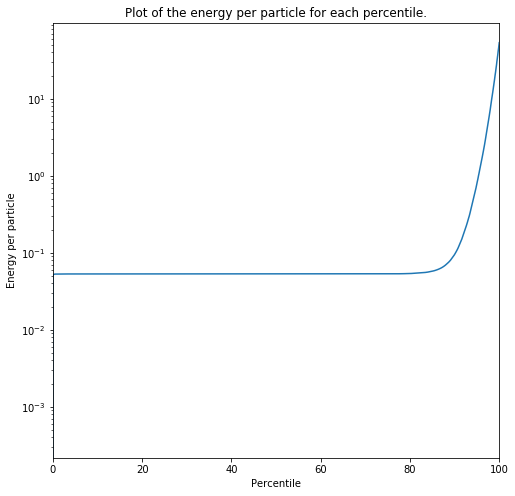

In [9]:
offset=min(data['potentialEnergy'])
data['potentialEnergy'] = data['potentialEnergy']-offset
#qLow = data['potentialEnergy'].quantile(0.00001)
qHi  = data['potentialEnergy'].quantile(0.95)
dataFiltered = data[(data['potentialEnergy'] < qHi)]# & (data['potentialEnergy'] > qLow)]

x = dataFiltered['potentialEnergy']
fig, ax = plt.subplots(figsize=(8, 8))
sortedX = np.sort(x) - 1.01 * min(x)
ax.plot([100*i/len(x) for i in range(0, len(x))], sortedX)
ax.set_xlim(0, 100)
ax.set_yscale('log')
ax.set_title('Plot of the energy per particle for each percentile.')
ax.set_ylabel('Energy per particle')
ax.set_xlabel('Percentile')
plt.show()

data = dataFiltered

In [10]:
#data.head()

In [11]:
data.describe()

,index,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,380000.000000,380000.000000,380000.0,380000.000000
mean,200002.884639,26.579486,4.0,0.592021
std,115494.287323,13.588725,0.0,3.623477
min,0.000000,1.167091,4.0,0.000000
25%,99953.750000,14.947339,4.0,0.053046
50%,200003.500000,26.706441,4.0,0.053046
75%,300054.250000,38.317992,4.0,0.053181
max,399999.000000,49.999906,4.0,53.335290


In [12]:
trainingData = data.sample(frac=0.8)
validationData = data.drop(trainingData.index)

inputData = []
targetData = []
for i in trainingData.index:
    inputData.append(trainingData['eigenvalues'][i])
    targetData.append(trainingData['potentialEnergy'][i])

trainingInput = [[inputData], [targetData]]

inputData = []
targetData = []
for i in validationData.index:
    inputData.append(validationData['eigenvalues'][i])
    targetData.append(validationData['potentialEnergy'][i])

validationInput = [[inputData], [targetData]]

# Machine learning

## Preparing testing

In [32]:
widthOfCell = 15.0
numberOfSurroundingCells = 4
R0=100
orderOfMatrix = [-1, -2]
x = np.linspace(0, 1, 80)

testData = {'particleCoordinates': [],'widthOfCell':[] , 'numberOfSurroundingCells': [], 'potentialEnergy':[]}# Initialy use a dictionary because it's easier to append to than a dataframe.
for i in x:
    particles = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, i])]
    particles = [widthOfCell * coordinate for coordinate in particles]
    otherSpace = generateSpace(particles, numberOfSurroundingCells, widthOfCell)# Generate the other space.
    testData['particleCoordinates'].append(particles)
    testData['widthOfCell'].append(widthOfCell)
    testData['numberOfSurroundingCells'].append(numberOfSurroundingCells)
    testData['potentialEnergy'].append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrio) - offset)# Calculate the potential energy and save it to the data dictonairy.

x = widthOfCell * x
testData = prepareDatabseForMachineLearning(pd.DataFrame(testData), orderOfMatrix, R0, giveUpdates = False)

testData.head()
testData.describe()

,index,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,80.0000,80.0,80.0,80.000000
mean,39.5000,15.0,4.0,0.053283
std,23.2379,0.0,0.0,0.000592
min,0.0000,15.0,4.0,0.053042
25%,19.7500,15.0,4.0,0.053042
50%,39.5000,15.0,4.0,0.053042
75%,59.2500,15.0,4.0,0.053092
max,79.0000,15.0,4.0,0.055513


## Model 1

In [14]:
settings = [['Dense', 512, 'softplus', False], ['Dense', 512, 'softplus', False], ['Dense', 1, 'linear', False]]
learningRate = 5*10**-4

model = makeNetwork(inputSize, settings, learningRate)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4096      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262144    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 512       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 266,752
Trainable params: 266,752
Non-trainable params: 0
________________________________________________

Train on 212800 samples, validate on 91200 samples
Epoch 1/30
212800/212800 [==============================] - 30s 142us/step - loss: 22.6230 - val_loss: 1.3248
Epoch 2/30
212800/212800 [==============================] - 29s 138us/step - loss: 0.8262 - val_loss: 0.4545
Epoch 3/30
212800/212800 [==============================] - 29s 136us/step - loss: 0.3568 - val_loss: 0.3445
Epoch 4/30
212800/212800 [==============================] - 29s 137us/step - loss: 0.2870 - val_loss: 0.2954
Epoch 5/30
212800/212800 [==============================] - 47s 219us/step - loss: 0.2613 - val_loss: 0.2673
Epoch 6/30
212800/212800 [==============================] - 30s 142us/step - loss: 0.2461 - val_loss: 0.2296
Epoch 7/30
212800/212800 [==============================] - 32s 150us/step - loss: 0.2299 - val_loss: 0.3521
Epoch 8/30
212800/212800 [==============================] - 29s 134us/step - loss: 0.2257 - val_loss: 0.1825
Epoch 9/30
212800/212800 [==============================] - 37s 174us/step -

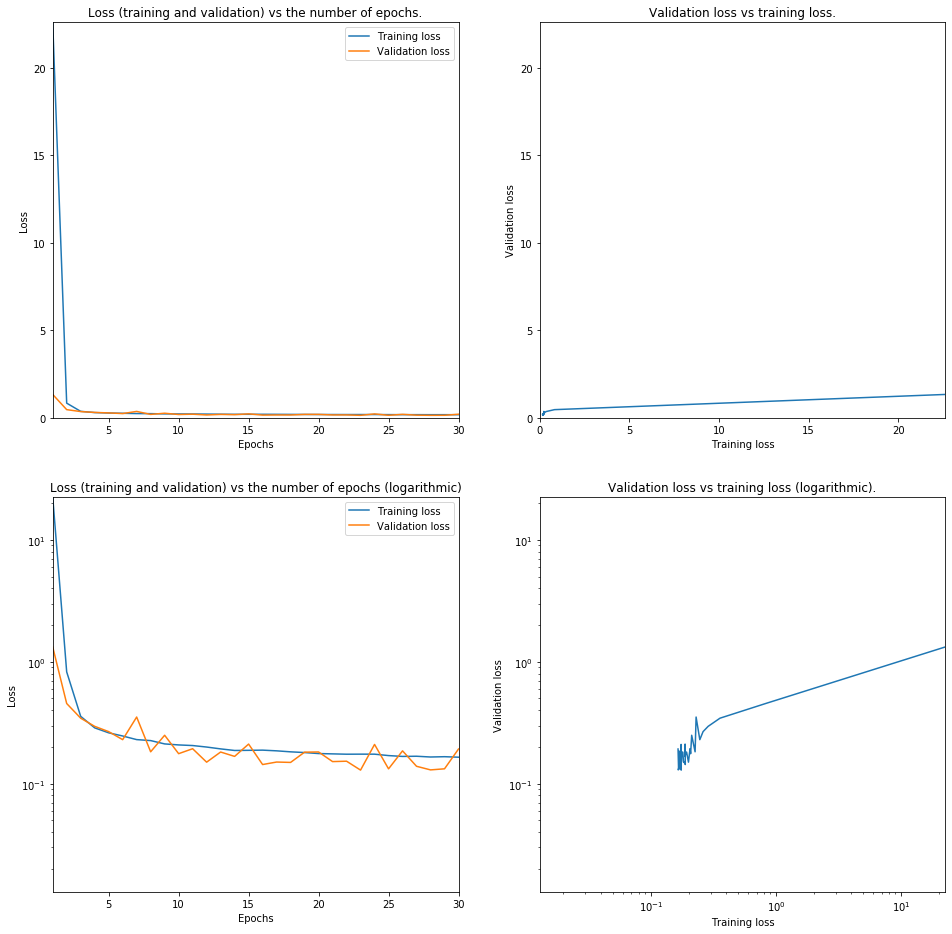

In [15]:
trainNetwork(model, trainingInput, 0.3, numberOfEpochs=30, batchSize=32, verboseSetting=1)
print()


76000/76000 [==============================] - 3s 40us/step
0.19756166698411107


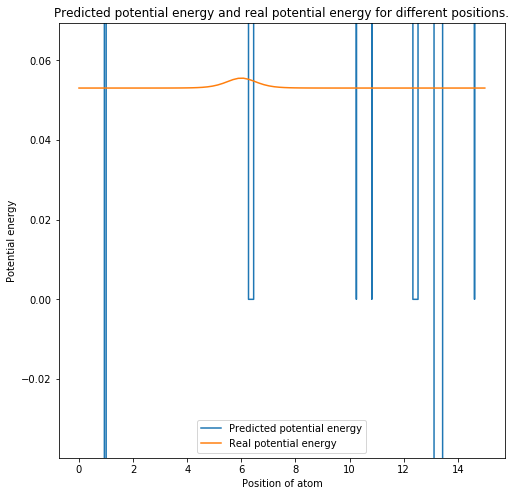

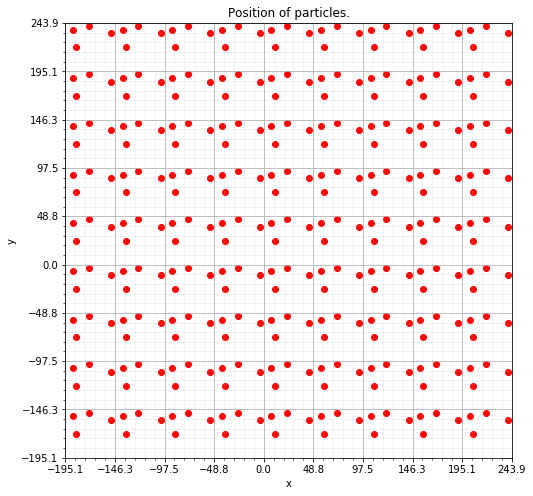

For index 9 Predicted 0.054216966 was 0.0530455982


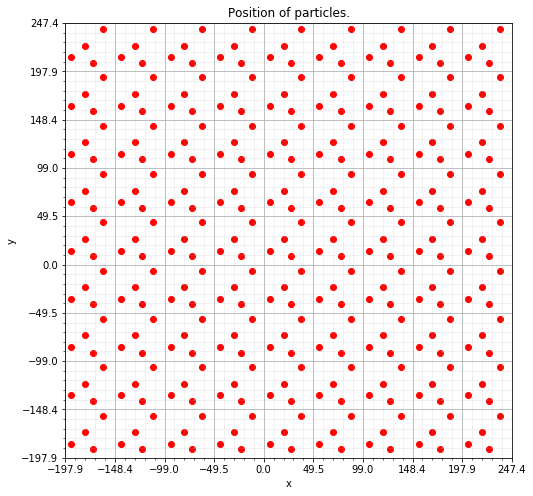

For index 13 Predicted 0.052746855 was 0.053045600000000005


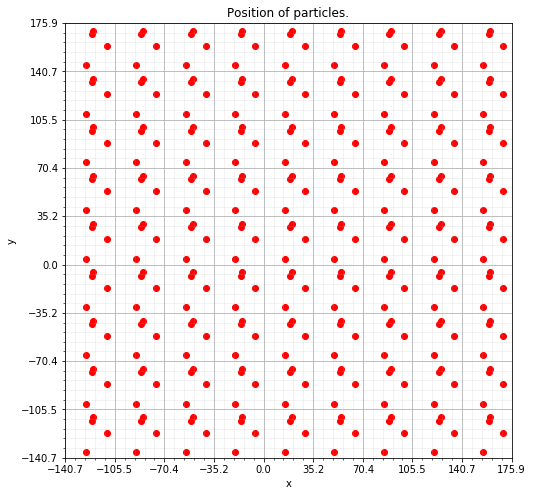

For index 18 Predicted 0.05690839 was 0.053069570700000006


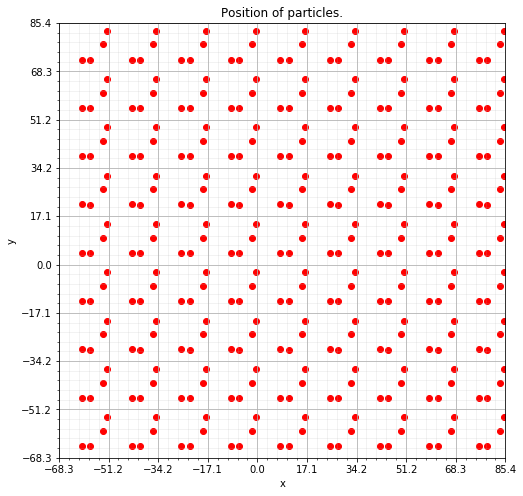

For index 21 Predicted 0.050579205 was 0.0530565952


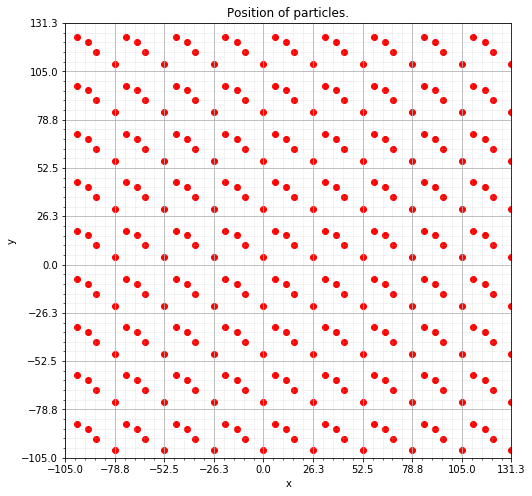

For index 30 Predicted 0.054392394 was 0.0530454834


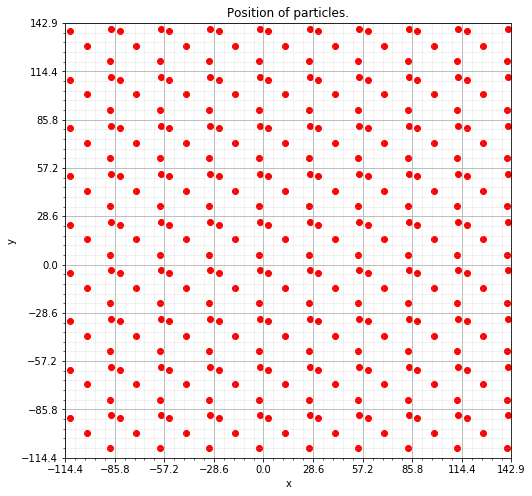

For index 32 Predicted 0.05401492 was 0.0530456501


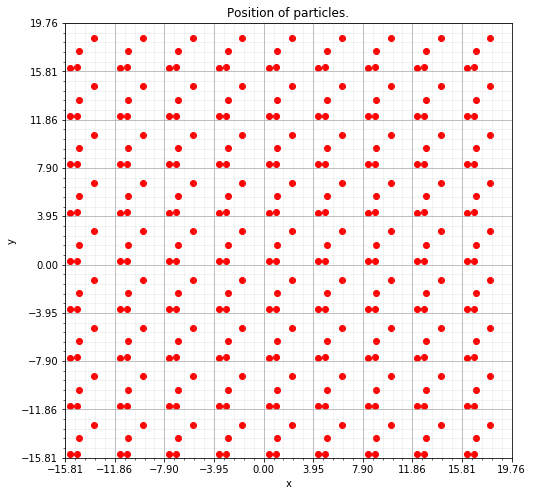

For index 33 Predicted 4.88723 was 5.9372280024


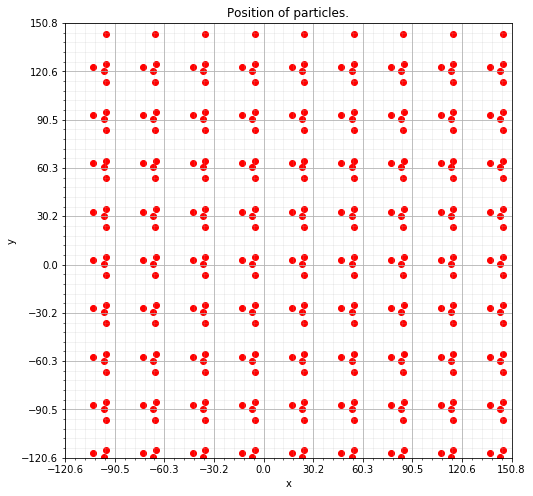

For index 35 Predicted 0.056133874 was 0.053045515


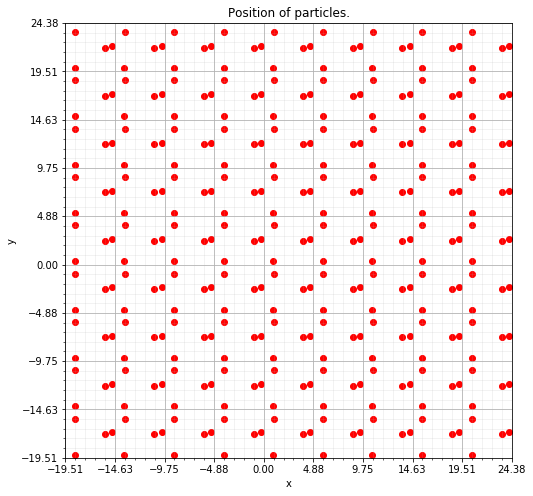

For index 42 Predicted 0.69588596 was 0.9959449529000001


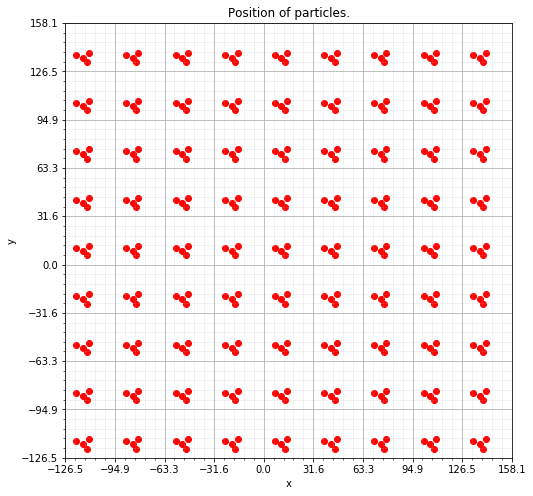

For index 48 Predicted 0.065999 was 0.053046315000000004



In [16]:
print(model.evaluate(validationInput[0], validationInput[1]))

y = [[],[]]
for i in range(len(x)):
    y[0].append(model.predict([[testData['eigenvalues'][i]]])[0][0])
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[0], label='Predicted potential energy')
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))

for i in range(0,10):
    plotAndPredict(model, validationData, validationData.index[i])

"""
print(model.summary())
for layer in model.layers:
    print(layer.get_weights())
#"""
print()

## Model 2

In [17]:
settings = [['Dense', 512, 'softplus', False], ['Dense', 512, 'softplus', False], ['Dense', 512, 'softplus', False], ['Dense', 1, 'linear', False]]
learningRate = 5*10**-4

model = makeNetwork(inputSize, settings, learningRate)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               4096      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262144    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262144    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

Train on 212800 samples, validate on 91200 samples
Epoch 1/30
212800/212800 [==============================] - 30s 140us/step - loss: 3.6915 - val_loss: 0.5402
Epoch 2/30
212800/212800 [==============================] - 30s 140us/step - loss: 0.5574 - val_loss: 0.5359
Epoch 3/30
212800/212800 [==============================] - 29s 139us/step - loss: 0.5754 - val_loss: 0.5603
Epoch 4/30
212800/212800 [==============================] - 30s 143us/step - loss: 0.5599 - val_loss: 0.5772
Epoch 5/30
212800/212800 [==============================] - 30s 141us/step - loss: 0.5606 - val_loss: 0.5672
Epoch 6/30
212800/212800 [==============================] - 31s 147us/step - loss: 0.5592 - val_loss: 0.5435
Epoch 7/30
212800/212800 [==============================] - 33s 157us/step - loss: 0.5601 - val_loss: 0.5776
Epoch 8/30
212800/212800 [==============================] - 29s 136us/step - loss: 0.5589 - val_loss: 0.5524
Epoch 9/30
212800/212800 [==============================] - 28s 130us/step - 

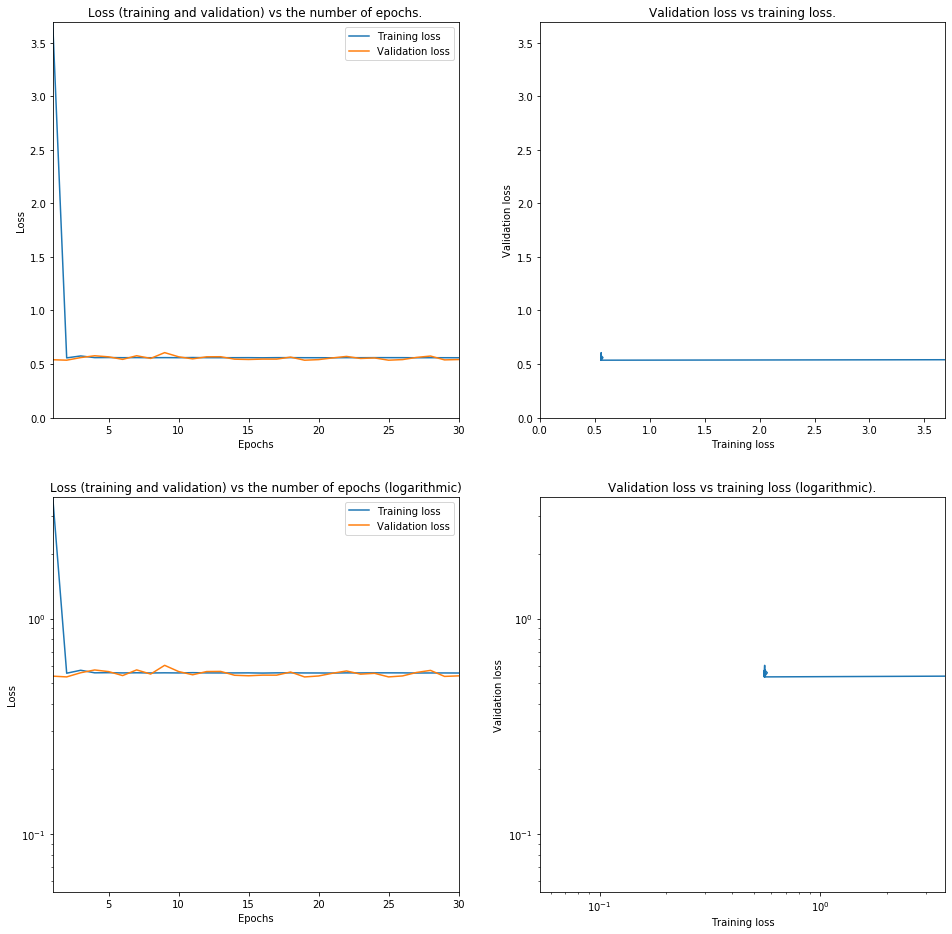

In [18]:
trainNetwork(model, trainingInput, 0.3, numberOfEpochs=30, batchSize=32, verboseSetting=1)
print()

76000/76000 [==============================] - 3s 41us/step
0.5495886243409233


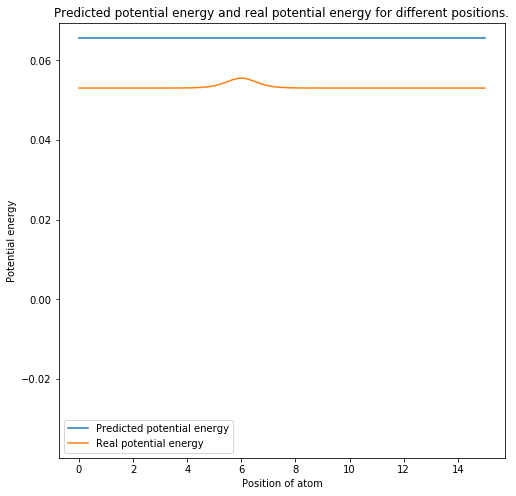

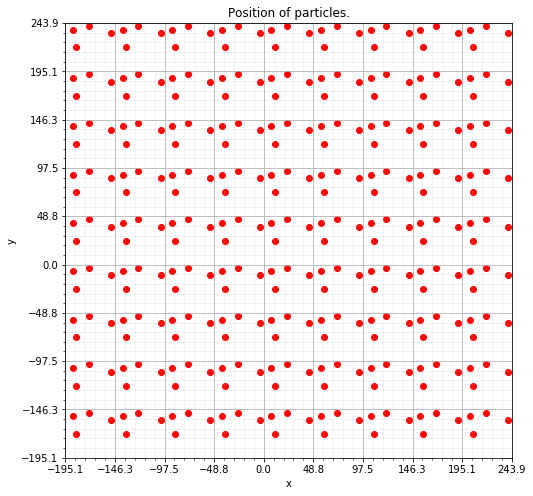

For index 9 Predicted 0.065561734 was 0.0530455982


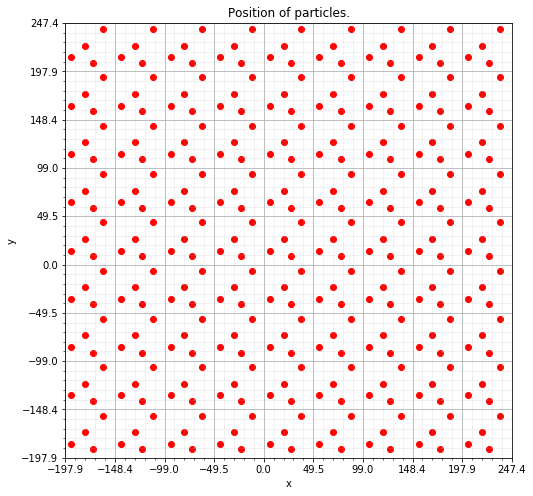

For index 13 Predicted 0.065561734 was 0.053045600000000005


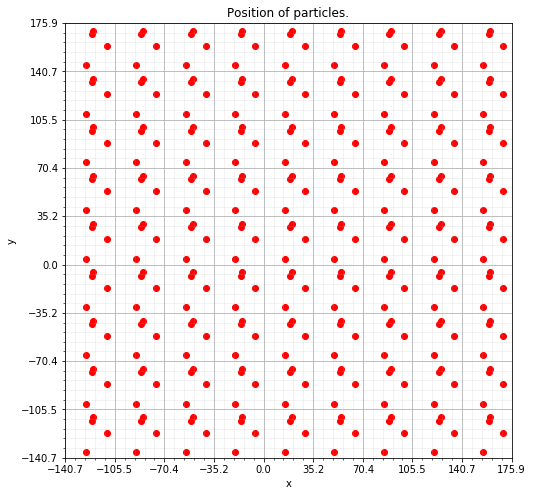

For index 18 Predicted 0.065561734 was 0.053069570700000006


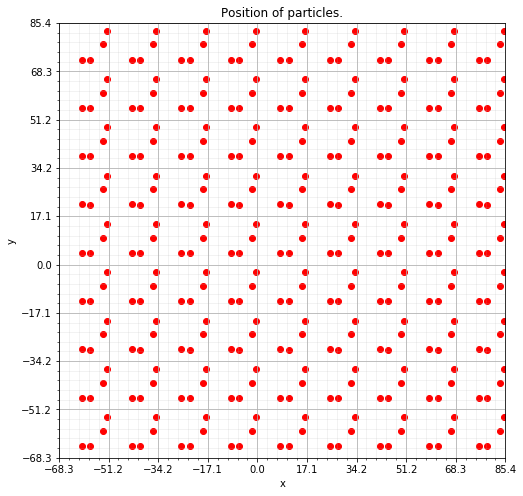

For index 21 Predicted 0.065561734 was 0.0530565952


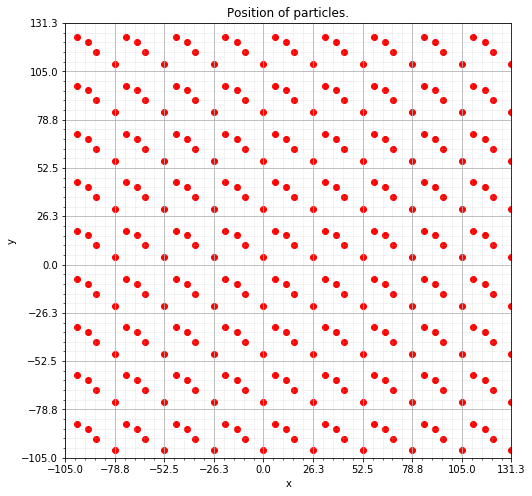

For index 30 Predicted 0.065561734 was 0.0530454834


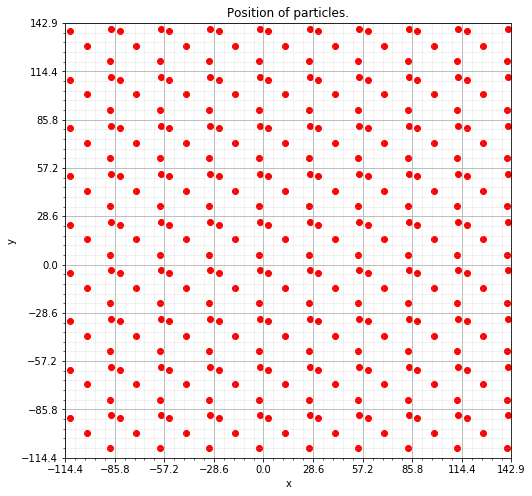

For index 32 Predicted 0.065561734 was 0.0530456501


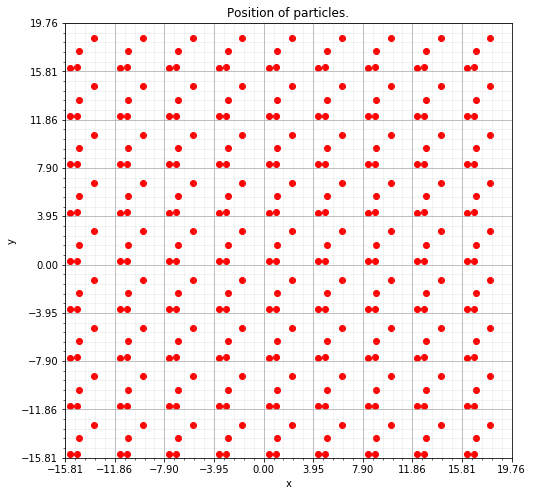

For index 33 Predicted 0.065561734 was 5.9372280024


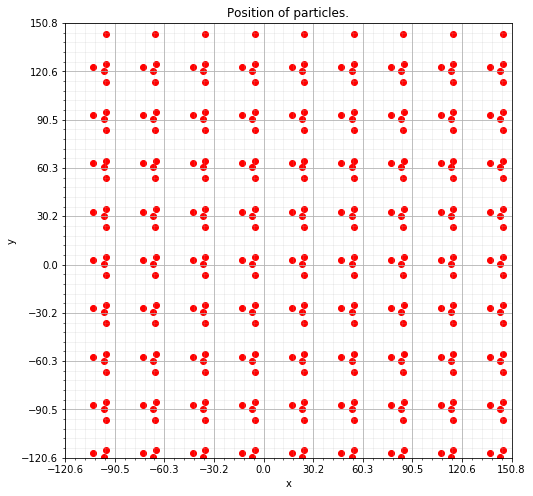

For index 35 Predicted 0.065561734 was 0.053045515


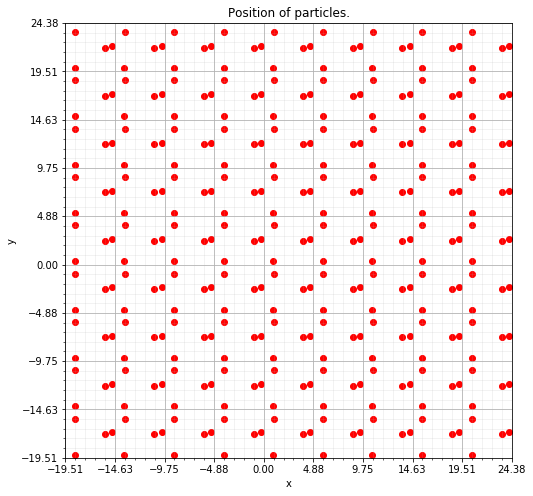

For index 42 Predicted 0.065561734 was 0.9959449529000001


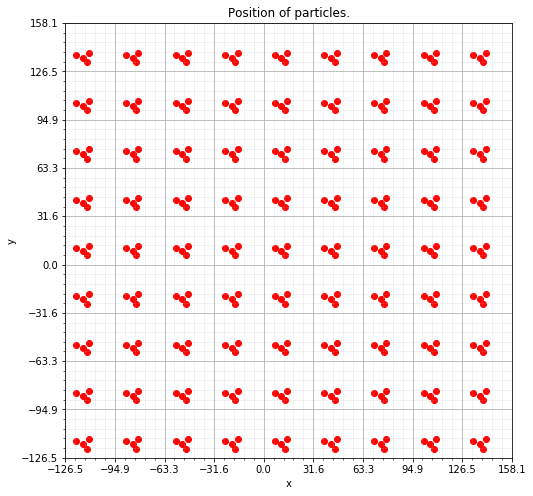

For index 48 Predicted 0.065561734 was 0.053046315000000004



In [19]:
print(model.evaluate(validationInput[0], validationInput[1]))

y = [[],[]]
for i in range(len(x)):
    y[0].append(model.predict([[testData['eigenvalues'][i]]])[0][0])
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[0], label='Predicted potential energy')
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))

for i in range(0,10):
    plotAndPredict(model, validationData, validationData.index[i])

"""
print(model.summary())
for layer in model.layers:
    print(layer.get_weights())
#"""
print()

## Model 3

In [20]:
settings = [['Dense', 512, 'softplus', False], ['Dense', 512, 'softplus', False], ['Dense', 512, 'softplus', False], ['Dense', 512, 'softplus', False], ['Dense', 1, 'linear', False]]
learningRate = 5*10**-4

model = makeNetwork(inputSize, settings, learningRate)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               4096      
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262144    
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262144    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)              

Train on 212800 samples, validate on 91200 samples
Epoch 1/30
212800/212800 [==============================] - 33s 154us/step - loss: 2.0798 - val_loss: 0.5658
Epoch 2/30
212800/212800 [==============================] - 36s 171us/step - loss: 0.5818 - val_loss: 0.5359
Epoch 3/30
212800/212800 [==============================] - 32s 150us/step - loss: 0.5590 - val_loss: 0.5555
Epoch 4/30
212800/212800 [==============================] - 31s 147us/step - loss: 0.5589 - val_loss: 0.5349
Epoch 5/30
212800/212800 [==============================] - 37s 173us/step - loss: 0.5601 - val_loss: 0.5469
Epoch 6/30
212800/212800 [==============================] - 40s 188us/step - loss: 0.5595 - val_loss: 0.5551
Epoch 7/30
212800/212800 [==============================] - 36s 170us/step - loss: 0.5587 - val_loss: 0.5432
Epoch 8/30
212800/212800 [==============================] - 37s 175us/step - loss: 0.5621 - val_loss: 0.5672
Epoch 9/30
212800/212800 [==============================] - 33s 155us/step - 

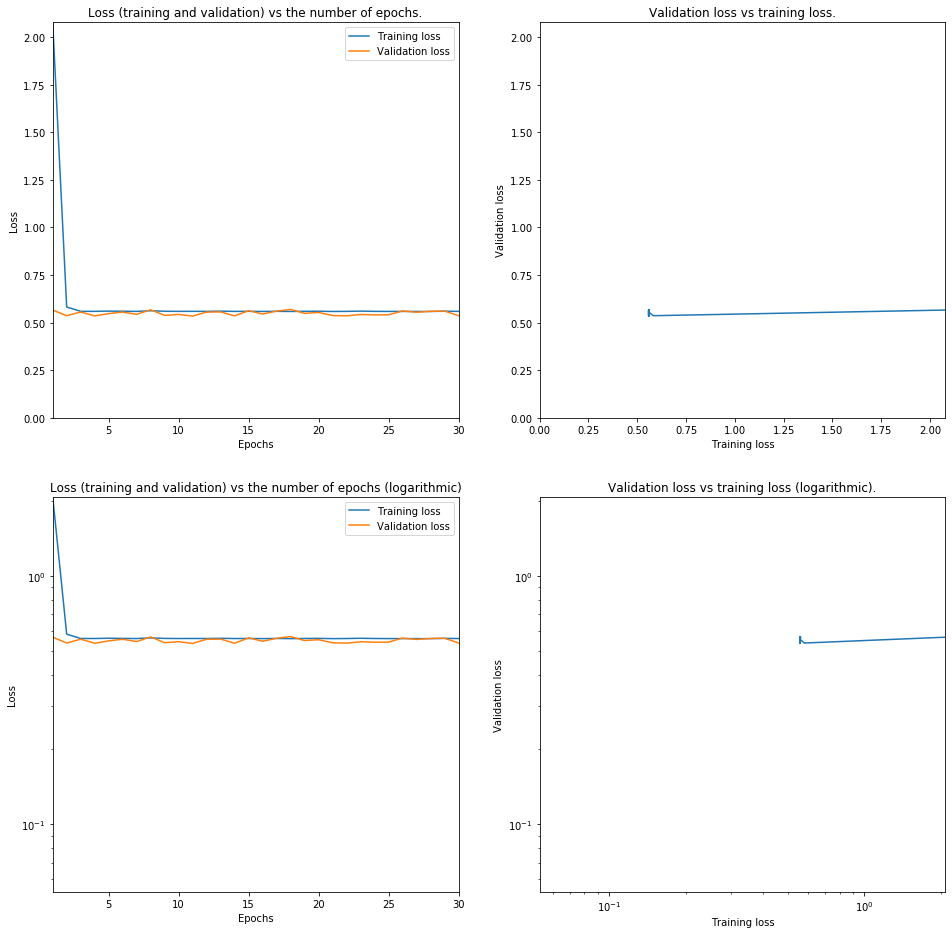

In [21]:
trainNetwork(model, trainingInput, 0.3, numberOfEpochs=30, batchSize=32, verboseSetting=1)
print()

76000/76000 [==============================] - 9s 119us/step
0.5442145261325334


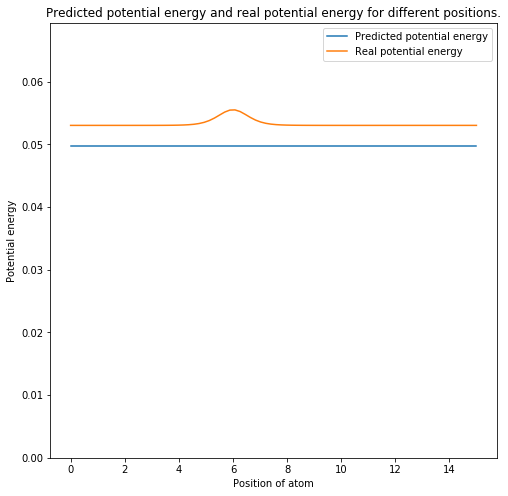

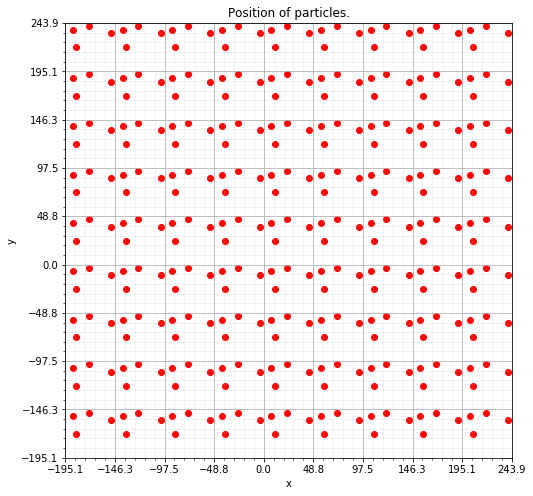

For index 9 Predicted 0.04969324 was 0.0530455982


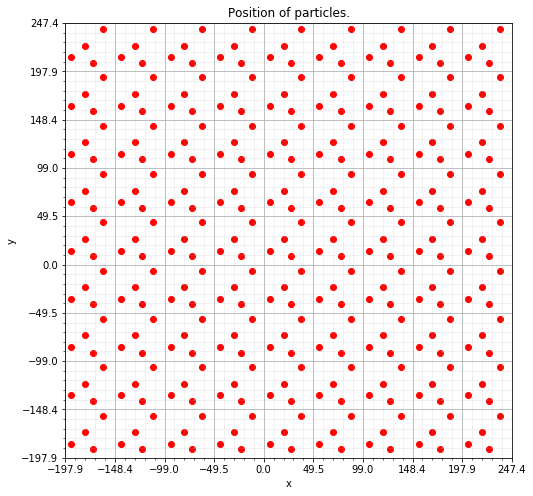

For index 13 Predicted 0.04969324 was 0.053045600000000005


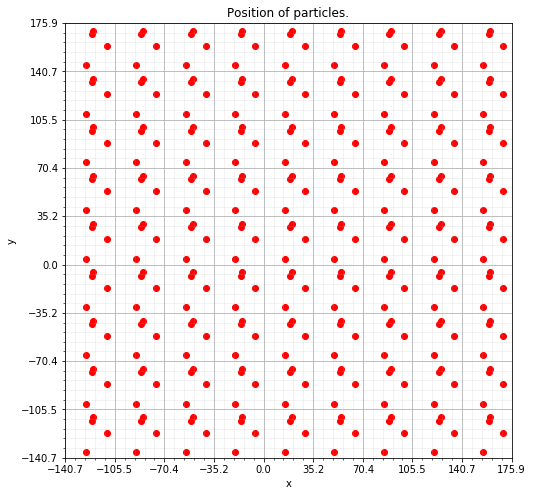

For index 18 Predicted 0.04969324 was 0.053069570700000006


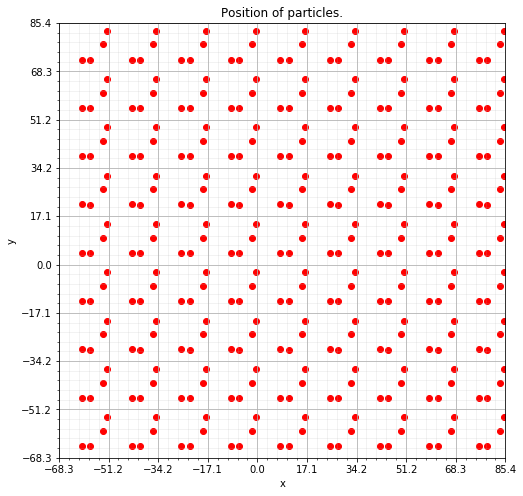

For index 21 Predicted 0.04969324 was 0.0530565952


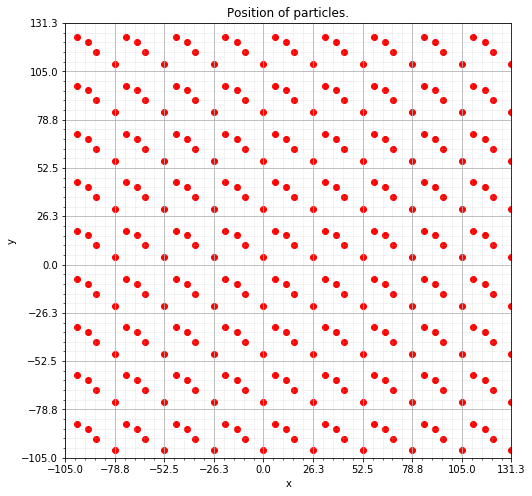

For index 30 Predicted 0.04969324 was 0.0530454834


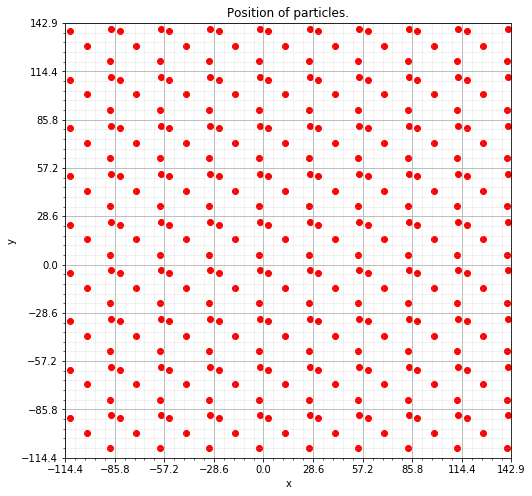

For index 32 Predicted 0.04969324 was 0.0530456501


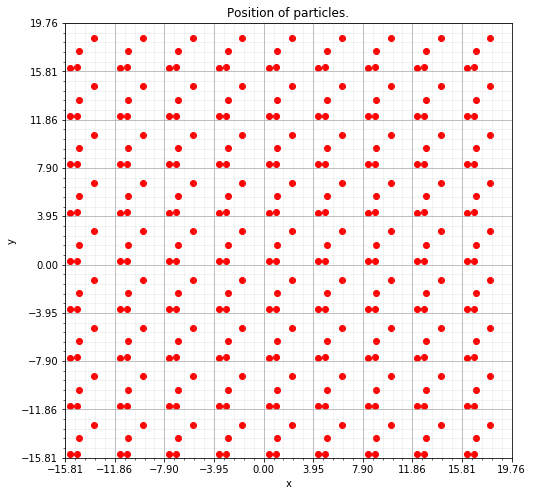

For index 33 Predicted 0.04969324 was 5.9372280024


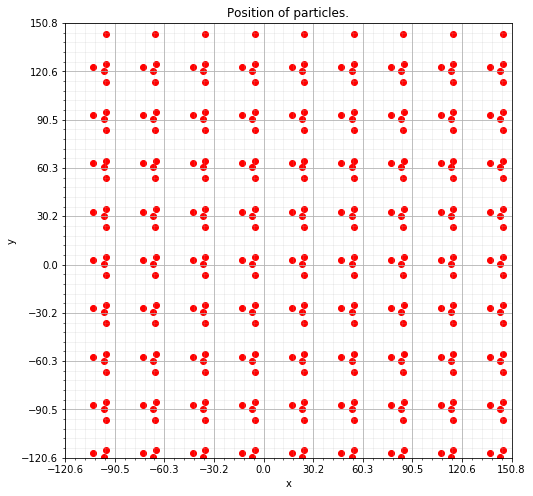

For index 35 Predicted 0.04969324 was 0.053045515


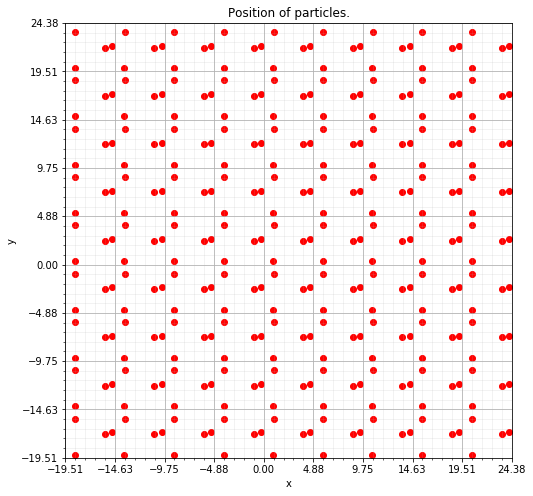

For index 42 Predicted 0.04969324 was 0.9959449529000001


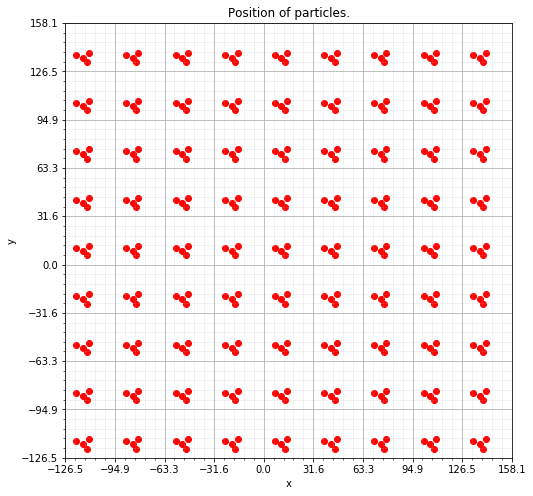

For index 48 Predicted 0.04969324 was 0.053046315000000004



In [22]:
print(model.evaluate(validationInput[0], validationInput[1]))

y = [[],[]]
for i in range(len(x)):
    y[0].append(model.predict([[testData['eigenvalues'][i]]])[0][0])
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[0], label='Predicted potential energy')
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))

for i in range(0,10):
    plotAndPredict(model, validationData, validationData.index[i])

"""
print(model.summary())
for layer in model.layers:
    print(layer.get_weights())
#"""
print()

## Model 4

In [26]:
settings = [['Dense', 4096, 'softplus', False], ['Dense', 1, 'linear', False]]
learningRate = 5*10**-4

model = makeNetwork(inputSize, settings, learningRate)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4096)              32768     
_________________________________________________________________
activation_16 (Activation)   (None, 4096)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4096      
_________________________________________________________________
activation_17 (Activation)   (None, 1)                 0         
Total params: 36,864
Trainable params: 36,864
Non-trainable params: 0
_________________________________________________________________


Train on 212800 samples, validate on 91200 samples
Epoch 1/30
212800/212800 [==============================] - 24s 114us/step - loss: 36.6927 - val_loss: 3.0054
Epoch 2/30
212800/212800 [==============================] - 23s 110us/step - loss: 2.7439 - val_loss: 0.8127
Epoch 3/30
212800/212800 [==============================] - 29s 135us/step - loss: 0.7127 - val_loss: 0.5858
Epoch 4/30
212800/212800 [==============================] - 21s 99us/step - loss: 0.7488 - val_loss: 0.5954
Epoch 5/30
212800/212800 [==============================] - 23s 106us/step - loss: 0.5771 - val_loss: 0.4056
Epoch 6/30
212800/212800 [==============================] - 24s 113us/step - loss: 0.5469 - val_loss: 0.6118
Epoch 7/30
212800/212800 [==============================] - 24s 112us/step - loss: 0.5005 - val_loss: 0.5769
Epoch 8/30
212800/212800 [==============================] - 24s 112us/step - loss: 0.4985 - val_loss: 0.3660
Epoch 9/30
212800/212800 [==============================] - 26s 123us/step - 

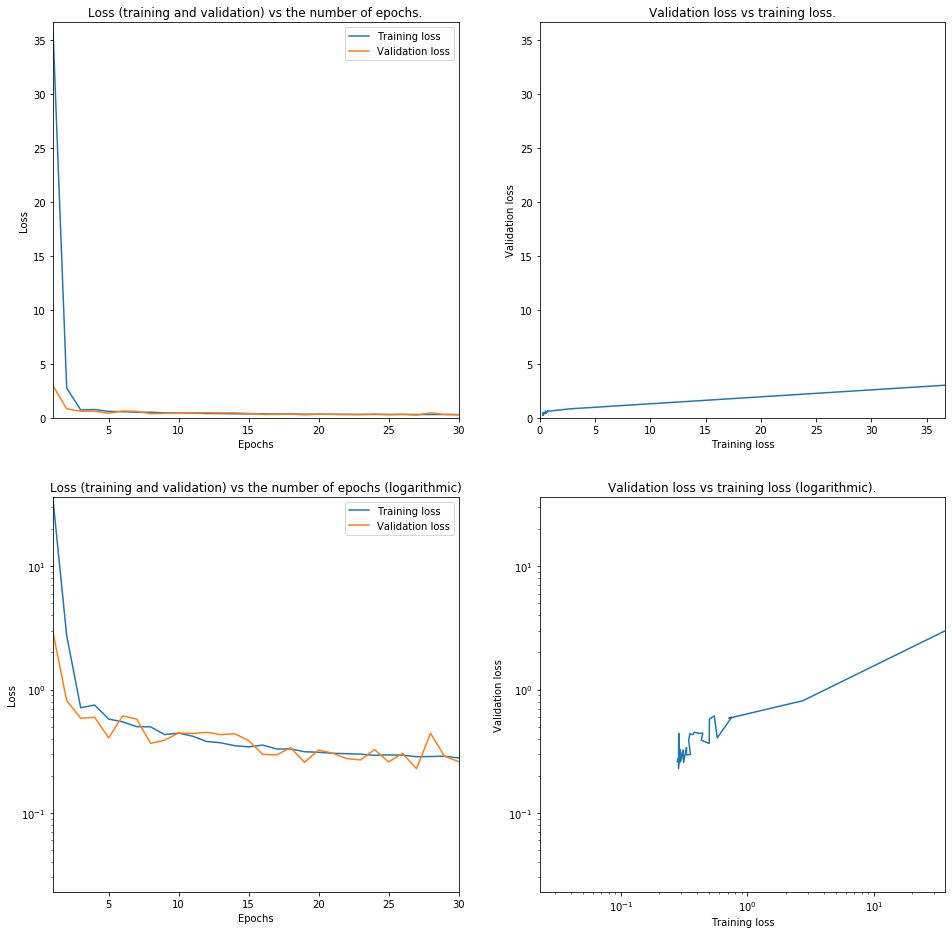

In [27]:
trainNetwork(model, trainingInput, 0.3, numberOfEpochs=30, batchSize=32, verboseSetting=1)
print()

76000/76000 [==============================] - 3s 39us/step
0.2709630432540649


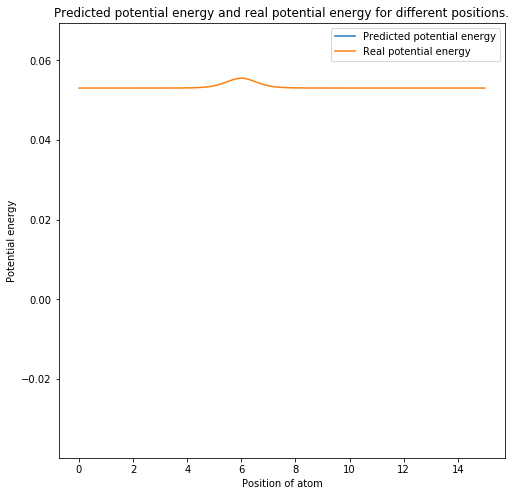

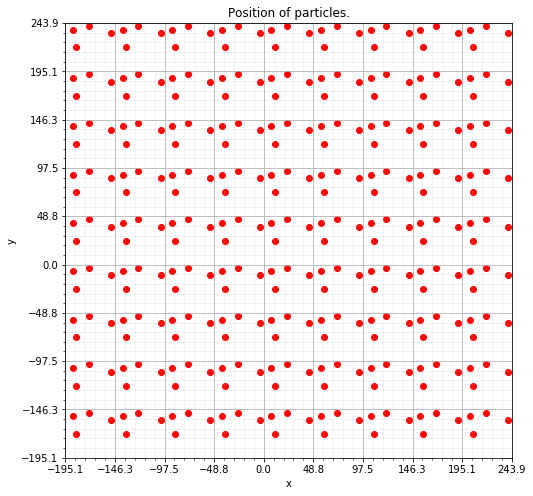

For index 9 Predicted 0.043325946 was 0.0530455982


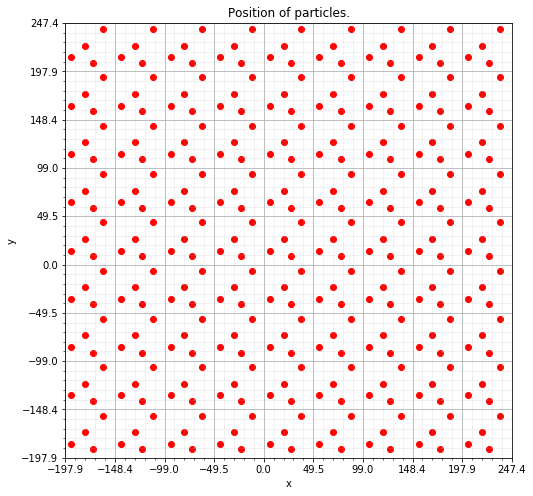

For index 13 Predicted 0.03988638 was 0.053045600000000005


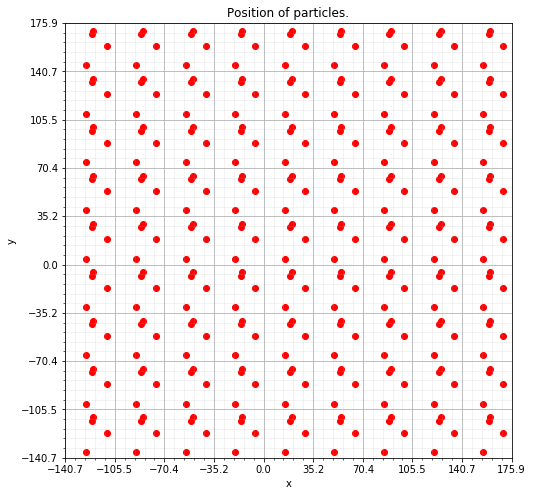

For index 18 Predicted 0.029425 was 0.053069570700000006


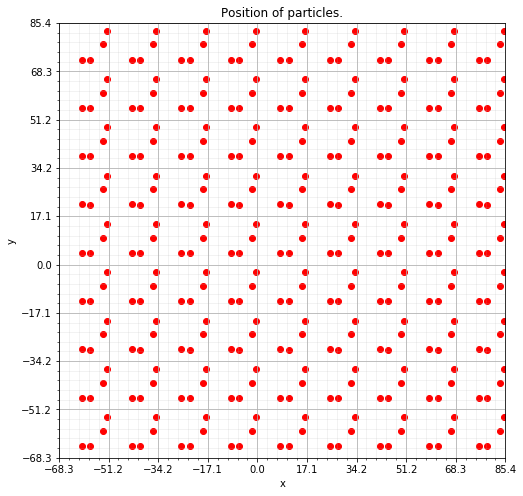

For index 21 Predicted 0.025405383 was 0.0530565952


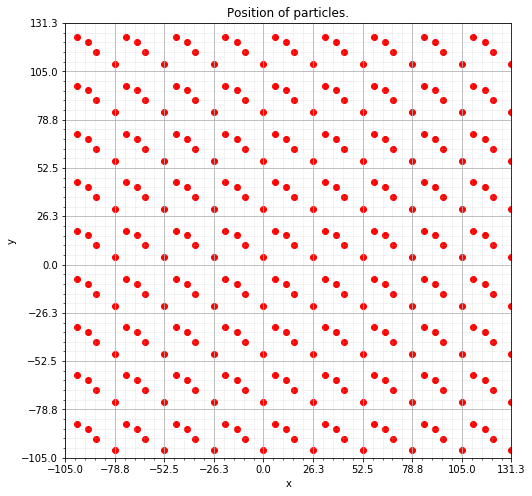

For index 30 Predicted 0.04706693 was 0.0530454834


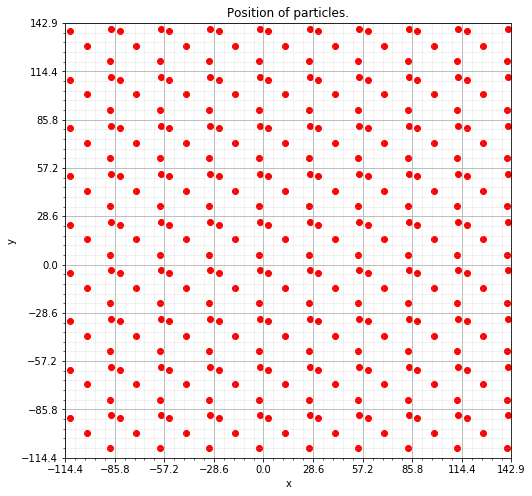

For index 32 Predicted 0.04724223 was 0.0530456501


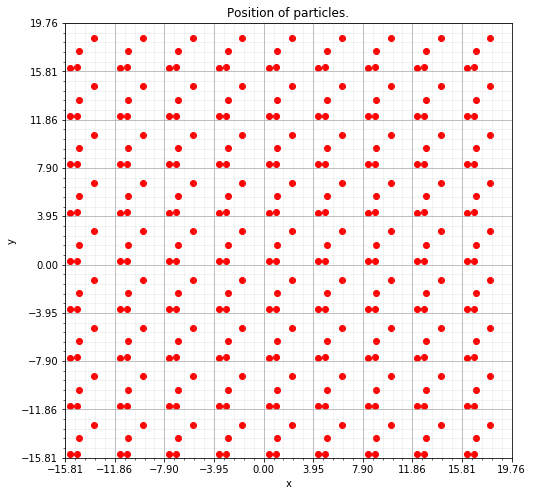

For index 33 Predicted 10.626308 was 5.9372280024


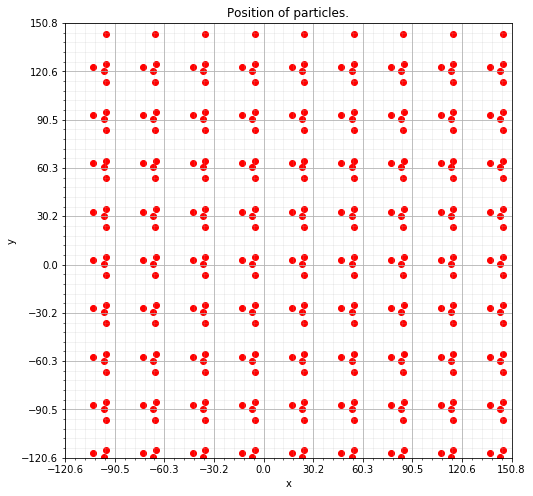

For index 35 Predicted 0.05786846 was 0.053045515


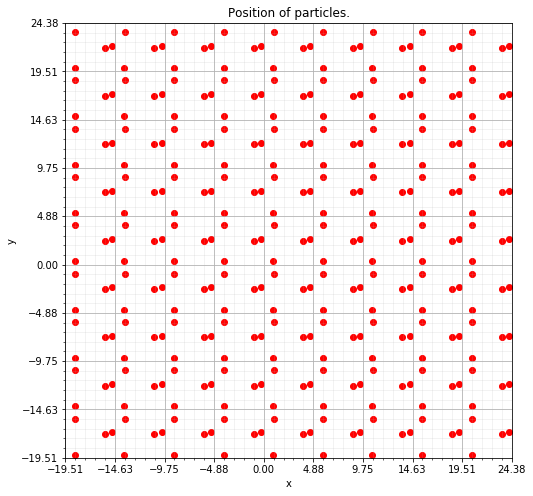

For index 42 Predicted 3.0188212 was 0.9959449529000001


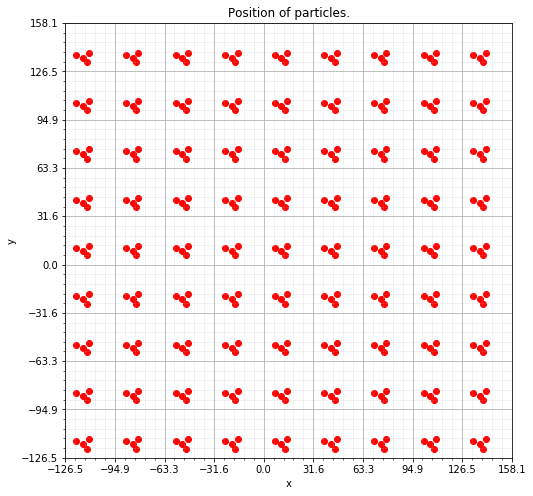

For index 48 Predicted 0.06874694 was 0.053046315000000004



In [28]:
print(model.evaluate(validationInput[0], validationInput[1]))

y = [[],[]]
for i in range(len(x)):
    y[0].append(model.predict([[testData['eigenvalues'][i]]])[0][0])
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[0], label='Predicted potential energy')
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))

for i in range(0,10):
    plotAndPredict(model, validationData, validationData.index[i])

"""
print(model.summary())
for layer in model.layers:
    print(layer.get_weights())
#"""
print()

## Model 5

In [29]:
settings = [['Dense', 8*4096, 'softplus', False], ['Dense', 1, 'linear', False]]
learningRate = 5*10**-4

model = makeNetwork(inputSize, settings, learningRate)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32768)             262144    
_________________________________________________________________
activation_18 (Activation)   (None, 32768)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 32768     
_________________________________________________________________
activation_19 (Activation)   (None, 1)                 0         
Total params: 294,912
Trainable params: 294,912
Non-trainable params: 0
_________________________________________________________________


Train on 212800 samples, validate on 91200 samples
Epoch 1/30
212800/212800 [==============================] - 27s 127us/step - loss: 17.3675 - val_loss: 1.8302
Epoch 2/30
212800/212800 [==============================] - 26s 121us/step - loss: 2.5851 - val_loss: 1.0851
Epoch 3/30
212800/212800 [==============================] - 32s 149us/step - loss: 2.6506 - val_loss: 0.9553
Epoch 4/30
212800/212800 [==============================] - 25s 118us/step - loss: 2.4371 - val_loss: 3.7639
Epoch 5/30
212800/212800 [==============================] - 26s 124us/step - loss: 2.4348 - val_loss: 3.8324
Epoch 6/30
212800/212800 [==============================] - 25s 116us/step - loss: 2.1186 - val_loss: 1.1051
Epoch 7/30
212800/212800 [==============================] - 24s 114us/step - loss: 1.6498 - val_loss: 1.6618
Epoch 8/30
212800/212800 [==============================] - 24s 114us/step - loss: 1.5745 - val_loss: 0.8548
Epoch 9/30
212800/212800 [==============================] - 25s 116us/step -

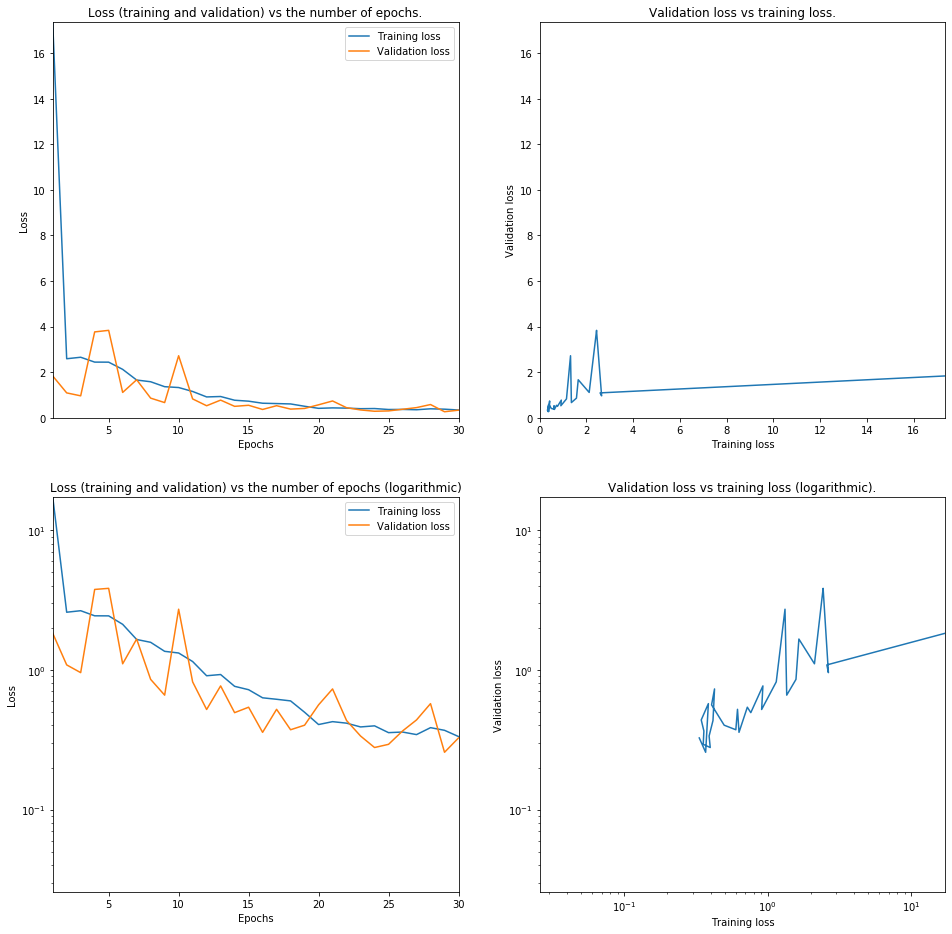

In [30]:
trainNetwork(model, trainingInput, 0.3, numberOfEpochs=30, batchSize=32, verboseSetting=1)
print()

76000/76000 [==============================] - 3s 35us/step
0.32240413598324125


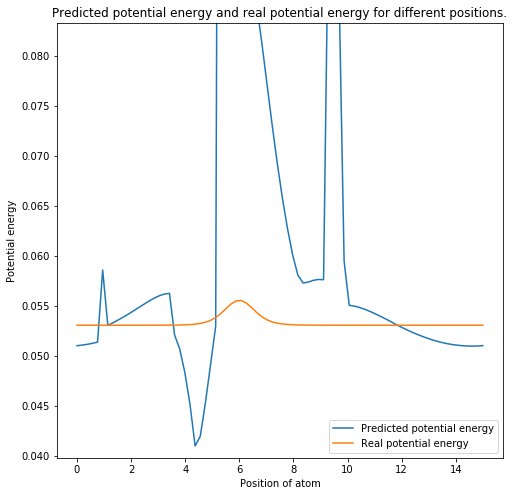

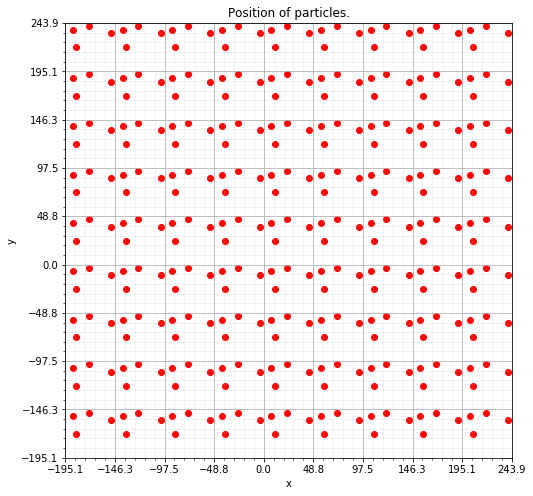

For index 9 Predicted 0.038309418 was 0.0530455982


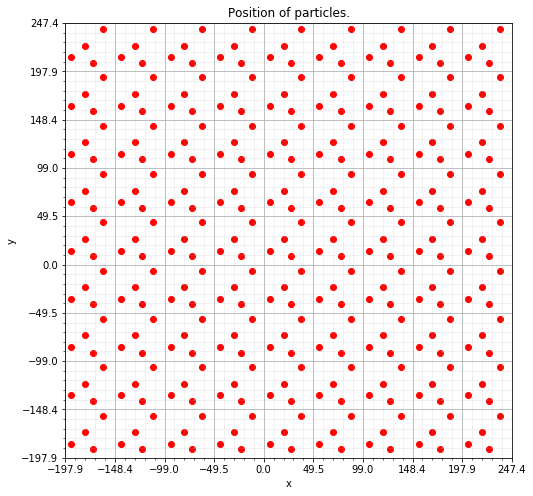

For index 13 Predicted 0.03492666 was 0.053045600000000005


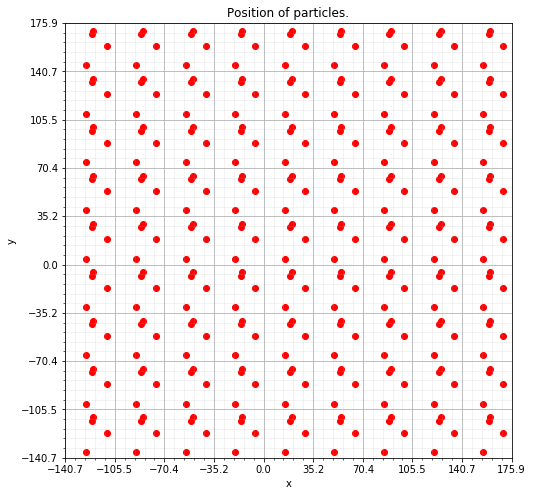

For index 18 Predicted 0.03948485 was 0.053069570700000006


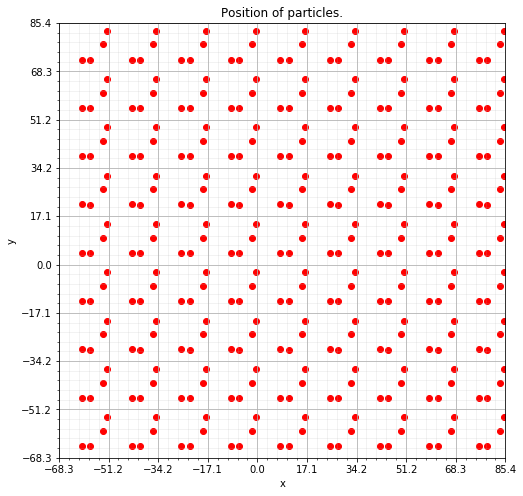

For index 21 Predicted 0.08858127 was 0.0530565952


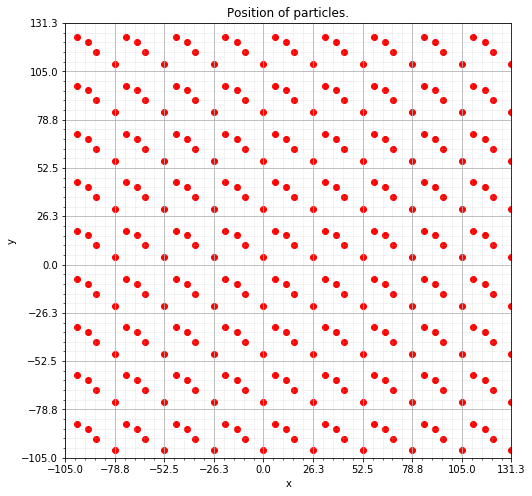

For index 30 Predicted 0.047968708 was 0.0530454834


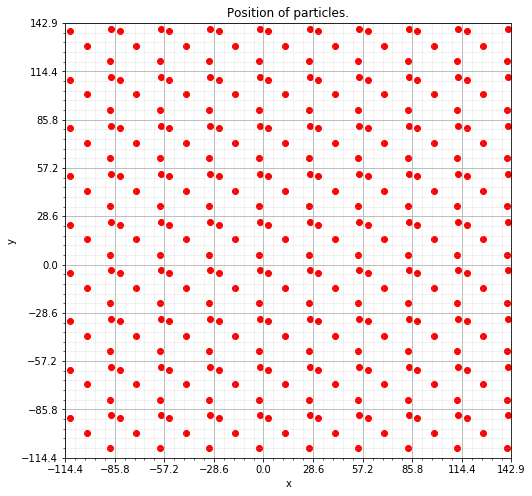

For index 32 Predicted 0.04969108 was 0.0530456501


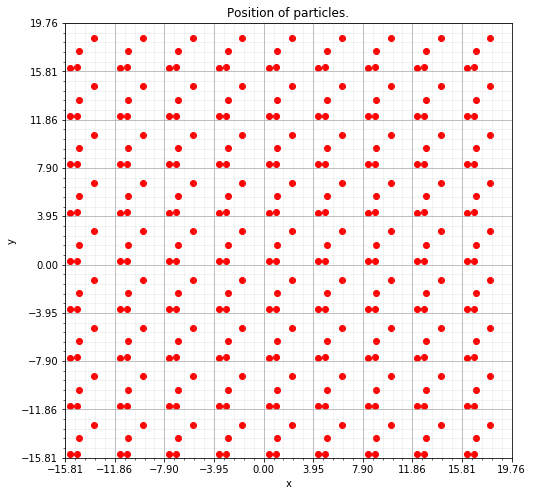

For index 33 Predicted 8.004295 was 5.9372280024


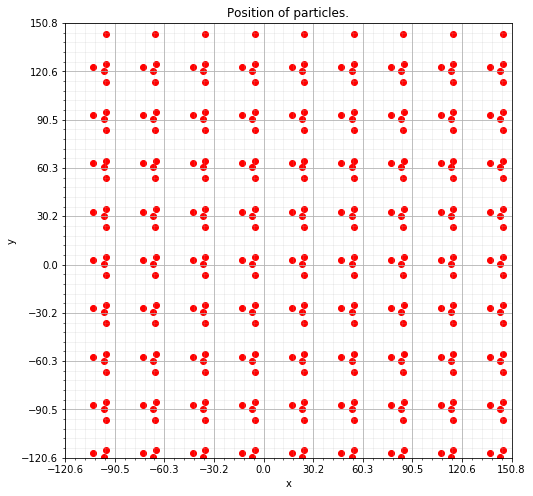

For index 35 Predicted 0.06355025 was 0.053045515


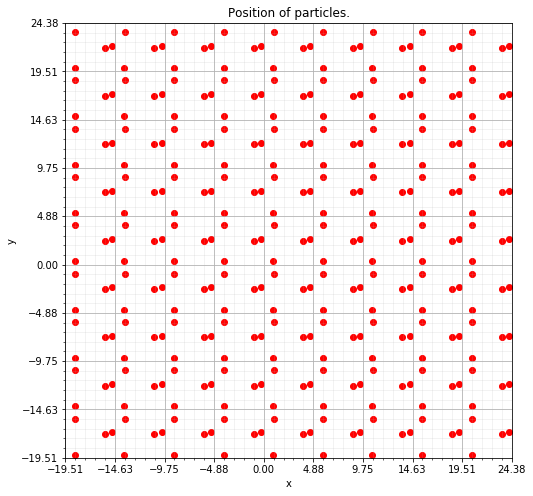

For index 42 Predicted 2.5522723 was 0.9959449529000001


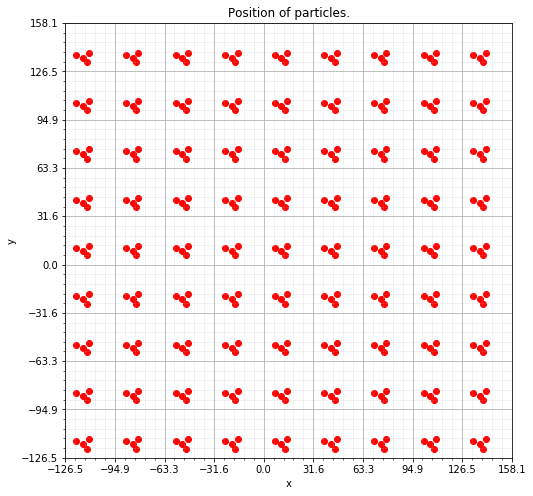

For index 48 Predicted 0.085186996 was 0.053046315000000004



In [35]:
print(model.evaluate(validationInput[0], validationInput[1]))

y = [[],[]]
for i in range(len(x)):
    y[0].append(model.predict([[testData['eigenvalues'][i]]])[0][0])
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[0], label='Predicted potential energy')
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))

for i in range(0,10):
    plotAndPredict(model, validationData, validationData.index[i])

"""
print(model.summary())
for layer in model.layers:
    print(layer.get_weights())
#"""
print()

## Model 6

In [ ]:
settings = [['Dense', 4096, 'softplus', False], ['Dense', 4096, 'softplus', False], ['Dense', 1, 'linear', False]]
learningRate = 5*10**-4

model = makeNetwork(inputSize, settings, learningRate)
model.summary()

In [ ]:
trainNetwork(model, trainingInput, 0.3, numberOfEpochs=30, batchSize=32, verboseSetting=1)
print()

In [ ]:
print(model.evaluate(validationInput[0], validationInput[1]))

y = [[],[]]
for i in range(len(x)):
    y[0].append(model.predict([[testData['eigenvalues'][i]]])[0][0])
    y[1].append(testData['potentialEnergy'][i])


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(list(x), y[0], label='Predicted potential energy')
ax1.plot(list(x), y[1], label='Real potential energy')
ax1.legend()
ax1.set_xlabel('Position of atom')
ax1.set_ylabel('Potential energy')
ax1.set_title('Predicted potential energy and real potential energy for different positions.')
ax1.set_ylim(-0.75 * offset , 1.5 * max(y[1]))

for i in range(0,10):
    plotAndPredict(model, validationData, validationData.index[i])

"""
print(model.summary())
for layer in model.layers:
    print(layer.get_weights())
#"""
print()